<a href="https://colab.research.google.com/github/numoworld/learnpytorchio/blob/main/03regular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import torch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

print('Torch version: ' + torch.__version__)
print('TorchVision version: ' + torchvision.__version__)

Torch version: 1.13.1+cu116
TorchVision version: 0.14.1+cu116


In [2]:
# get training data
train_data = datasets.FashionMNIST(
    root='data',
    download=True,
    train=True,
    transform=ToTensor()
)

# get test data
test_data = datasets.FashionMNIST(
    root='data',
    download=True,
    train=False,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

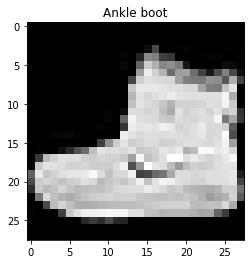

In [3]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(train_data.classes[label])

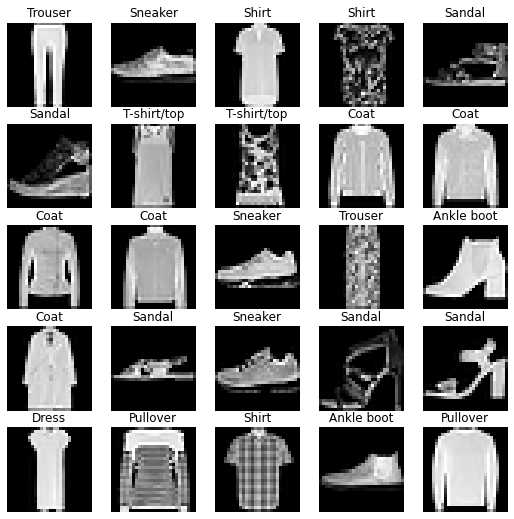

In [4]:
torch.manual_seed(721)

rows, cols = 5, 5
fig = plt.figure(figsize=(9,9))

for i in range(1, rows * cols + 1):
  index = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(train_data.classes[label])
  plt.axis(False)

In [5]:
from torch.utils.data import DataLoader


BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=True
                              )
test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False
                             )

In [6]:
# creating model

class FashionMNISTV0(nn.Module):
  def __init__(self, input_shape, output_shape, hidden_units=10):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.stack(x)

model0 = FashionMNISTV0(input_shape=784, output_shape=10)
model0

FashionMNISTV0(
  (stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [7]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [8]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [9]:
from timeit import default_timer as timer

def print_train_time(start, end, device):
  elapsed = end - start
  print(f'Train time in {device}: {elapsed:3f} seconds.')

In [10]:
from tqdm.auto import tqdm

torch.manual_seed(721)
n_epochs = 3

train_time_start_cpu = timer()

for epoch in tqdm(range(n_epochs)):
  print(f'Epoch: {epoch}\n-------')

  ## Training
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model0.train()

    y_pred = model0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f'Sample {batch*len(X)}/{len(train_dataloader.dataset)}')
  train_loss /= len(train_dataloader)

  ## Testing
  test_loss, test_acc = 0, 0
  model0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model0(X)

      test_loss += loss_fn(test_pred, y)
      
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
  
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'\nTrain Loss: {train_loss} | Test Loss: {test_loss} | Test Acc: {test_acc}')

train_time_end_cpu = timer()
print_train_time(train_time_start_cpu, train_time_end_cpu, 'cpu')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Sample 0/60000
Sample 12800/60000
Sample 25600/60000
Sample 38400/60000
Sample 51200/60000

Train Loss: 0.5869593024253845 | Test Loss: 0.5198444724082947 | Test Acc: 82.42811501597444
Epoch: 1
-------
Sample 0/60000
Sample 12800/60000
Sample 25600/60000
Sample 38400/60000
Sample 51200/60000

Train Loss: 0.47495999932289124 | Test Loss: 0.4998815953731537 | Test Acc: 82.56789137380191
Epoch: 2
-------
Sample 0/60000
Sample 12800/60000
Sample 25600/60000
Sample 38400/60000
Sample 51200/60000

Train Loss: 0.45300745964050293 | Test Loss: 0.4820919930934906 | Test Acc: 83.0870607028754
Train time in cpu: 28.593899 seconds.


In [11]:
# new nonlinear model with device-agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
class FashionModelV1(nn.Module):
  def __init__(self, in_features, out_features, hidden_units=10):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features),
    )
    
  def forward(self, x):
    return self.layer_stack(x)

model1 = FashionModelV1(in_features=784, out_features=10).to(device)
model1

FashionModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

In [14]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    loss_fn: torch.nn.Module,
    acc_fn,
    device: torch.device
):
  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    train_acc += acc_fn(y_pred.argmax(dim=1), y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f'Sample {batch*len(X)}/{len(data_loader.dataset)}')

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train Loss: {train_loss} | Train Accuracy: {train_acc}')

def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    acc_fn,
    device: torch.device
):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)
      
      test_loss += loss_fn(y_pred, y)
      test_acc += acc_fn(y_pred.argmax(dim=1), y)

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f'Test Loss: {test_loss} | Test Accuracy: {test_acc}')

In [15]:
torch.manual_seed(721)

n_epochs = 3

start_time = timer()
for epoch in tqdm(range(n_epochs)):
  print(f'Epoch: {epoch}\n------')
  train_step(
      model=model1,
      data_loader=train_dataloader,
      optimizer=optimizer,
      loss_fn=loss_fn,
      acc_fn=accuracy_fn,
      device=device
  )
  test_step(
      model=model1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      acc_fn=accuracy_fn,
      device=device
  )

end_time = timer()
print(f'Train time on {device}: {(end_time - start_time):3f}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Sample 0/60000
Sample 12800/60000
Sample 25600/60000
Sample 38400/60000
Sample 51200/60000
Train Loss: 0.6331556439399719 | Train Accuracy: 77.37
Test Loss: 0.5061330199241638 | Test Accuracy: 82.5479233226837
Epoch: 1
------
Sample 0/60000
Sample 12800/60000
Sample 25600/60000
Sample 38400/60000
Sample 51200/60000
Train Loss: 0.48328897356987 | Train Accuracy: 82.77166666666666
Test Loss: 0.5233147740364075 | Test Accuracy: 81.58945686900958
Epoch: 2
------
Sample 0/60000
Sample 12800/60000
Sample 25600/60000
Sample 38400/60000
Sample 51200/60000
Train Loss: 0.450692743062973 | Train Accuracy: 83.79333333333334
Test Loss: 0.4938254952430725 | Test Accuracy: 82.39816293929712
Train time on cuda: 28.382309
